In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#load Yolo
net =cv2.dnn.readNet('yolov3.weights','yolov3.cfg') # dnn is deep neural network

classes=[] # object which we want to detect

# add all object name from coco.names file
with open('coco.names','r') as f:
    classes=[line.strip() for line in f.readlines()]
print(classes)    
print(len(classes))

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
80


In [24]:
layers_names=net.getLayerNames()
print(layers_names)
output_layers=[layers_names[i[0]-1] for i in net.getUnconnectedOutLayers()]
print(output_layers)
colors=np.random.uniform(0,255,size=(len(classes),3))
print(colors)

['conv_0', 'bn_0', 'relu_0', 'conv_1', 'bn_1', 'relu_1', 'conv_2', 'bn_2', 'relu_2', 'conv_3', 'bn_3', 'relu_3', 'shortcut_4', 'conv_5', 'bn_5', 'relu_5', 'conv_6', 'bn_6', 'relu_6', 'conv_7', 'bn_7', 'relu_7', 'shortcut_8', 'conv_9', 'bn_9', 'relu_9', 'conv_10', 'bn_10', 'relu_10', 'shortcut_11', 'conv_12', 'bn_12', 'relu_12', 'conv_13', 'bn_13', 'relu_13', 'conv_14', 'bn_14', 'relu_14', 'shortcut_15', 'conv_16', 'bn_16', 'relu_16', 'conv_17', 'bn_17', 'relu_17', 'shortcut_18', 'conv_19', 'bn_19', 'relu_19', 'conv_20', 'bn_20', 'relu_20', 'shortcut_21', 'conv_22', 'bn_22', 'relu_22', 'conv_23', 'bn_23', 'relu_23', 'shortcut_24', 'conv_25', 'bn_25', 'relu_25', 'conv_26', 'bn_26', 'relu_26', 'shortcut_27', 'conv_28', 'bn_28', 'relu_28', 'conv_29', 'bn_29', 'relu_29', 'shortcut_30', 'conv_31', 'bn_31', 'relu_31', 'conv_32', 'bn_32', 'relu_32', 'shortcut_33', 'conv_34', 'bn_34', 'relu_34', 'conv_35', 'bn_35', 'relu_35', 'shortcut_36', 'conv_37', 'bn_37', 'relu_37', 'conv_38', 'bn_38', 're

height 266 weight 396 channel 3


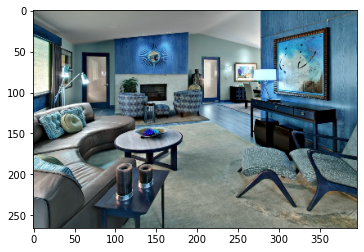

In [25]:
img=cv2.imread('1.jpg')
img=cv2.resize(img,None,fx=0.4,fy=0.4)
h,w,c=img.shape
print('height',h,'weight',w,'channel',c)
plt.imshow(img)

In [26]:
blob=cv2.dnn.blobFromImage(img,0.00392,(416,416),(0,0,0),True,crop=False)
net.setInput(blob)
outs=net.forward(output_layers)

In [27]:
class_ids = []

confidences = []

boxes = []

for out in outs:

    for detection in out:

        scores = detection[5:]

        class_id = np.argmax(scores)

        confidence = scores[class_id]

        if confidence > 0.5:

            # Object detected

            center_x = int(detection[0] * w)

            center_y = int(detection[1] * h)

            w1 = int(detection[2] * w)

            h1 = int(detection[3] * h)

            # Rectangle coordinates

            x = int(center_x - w1 / 2)

            y = int(center_y - h1 / 2)

            boxes.append([x, y, w1, h1])

            confidences.append(float(confidence))

            class_ids.append(class_id)

In [28]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4) 

# NMS - non max supression

#print(indexes)

font = cv2.FONT_HERSHEY_PLAIN

for i in range(len(boxes)):

    if i in indexes:

        x, y, w, h = boxes[i]

        label = str(classes[class_ids[i]])

        color = colors[i]

        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2) 

        # Draw rectangle around boxes. '2' is the width of box.

        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)

        # Text in Box to label the object

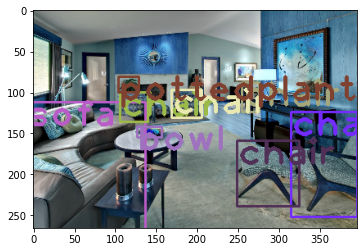

In [29]:
plt.imshow(img)
#cv2.imshow("img",img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()